# Clothe detection - NN - Keras

## Importing libraries

In [48]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [27]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

Fashim_minst is an array where each element is an image in binary grayscale.

Each image is represented as a 28 x 28 array instead of a 1D array of 784. 

The pixel intensities are represented as integers from 0 to 255

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [21]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_test[-5000:], y_test[-5000:]

In [22]:
X_train.shape

(55000, 28, 28)

In [23]:
X_train.dtype

dtype('uint8')

We need to scale the pixel between 0-1 range by dividing them by 255.0 (It will convert them to floats)

In [24]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

In [28]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [29]:
class_names[y_train[0]]

'Ankle boot'

## Create model with Sequential API

In [32]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

### Explanation
1. We set Tesorflow's random seed to make the results reproducible.
2. We create a sequential model. This is the simplest model that are just composed of a single stack of layers connected sequentially.
3. Next, we build the first layer (Input) and add it to the model.
4. We add a Flatten layer that converts each input image into a 1D array. If the shape is 28 x 28 it will flatten it to 784
5. We add a Dense hidden layer with 300 neurons that use the relu activation function. Each dense layer manages its own weight matrix.
6. We add a second dense hidden layer with 100 neurons.
7. Finally, we add a Dense output layer with 10 neurons (one per class) using the softmax function because the classes are exlusive.

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.layers

In [37]:
weights, biases = model.layers[1].get_weights()

In [38]:
weights

array([[-0.00723255,  0.01999971, -0.00401317, ...,  0.05069391,
         0.03125893, -0.04822   ],
       [ 0.02767061, -0.04321844, -0.03094533, ...,  0.03026091,
        -0.07349665, -0.05914466],
       [-0.02861355, -0.02747106, -0.01967055, ..., -0.01537863,
         0.02672997,  0.03738043],
       ...,
       [-0.01546647,  0.00896215,  0.01639029, ...,  0.03861678,
        -0.05014536, -0.01845308],
       [-0.02087749,  0.07084669, -0.07328918, ...,  0.03038879,
        -0.05147161,  0.05316515],
       [ 0.06677544,  0.00549341,  0.00892608, ..., -0.02463179,
         0.02566045, -0.01499402]], dtype=float32)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

The weights are initialized randomly to break simmetry and the biases were initialized to zeros

In [40]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

The sparse_categorical_crossentropy is used because we have sparse labels (For each instance, there is just a target class index from 0 to 9) and the classes are exclusive.

The optimizer is sdg wich means we'll use Stochastic Gradien Descendent

In [41]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2024-02-17 15:42:46.416602: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-17 15:42:46.562760: I external/local_xla/xla/service/service.cc:168] XLA service 0x55a4f99a7690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-17 15:42:46.562784: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2024-02-17 15:42:46.604150: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


   1/1719 [..............................] - ETA: 27:04 - loss: 2.4226 - accuracy: 0.0312

I0000 00:00:1708195366.666561   11248 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 3s 1ms/step - loss: 0.7081 - accuracy: 0.7700 - val_loss: 0.5398 - val_accuracy: 0.8130
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4860 - accuracy: 0.8317 - val_loss: 0.4972 - val_accuracy: 0.8178
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4382 - accuracy: 0.8467 - val_loss: 0.4631 - val_accuracy: 0.8336
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4128 - accuracy: 0.8556 - val_loss: 0.4261 - val_accuracy: 0.8466
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3916 - accuracy: 0.8632 - val_loss: 0.4238 - val_accuracy: 0.8490
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3753 - accuracy: 0.8685 - val_loss: 0.4302 - val_accuracy: 0.8458
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3628 - accuracy: 0.8708 - val_loss: 0.3967 - val_accuracy: 0.8584
Epo

<Axes: xlabel='Epoch'>

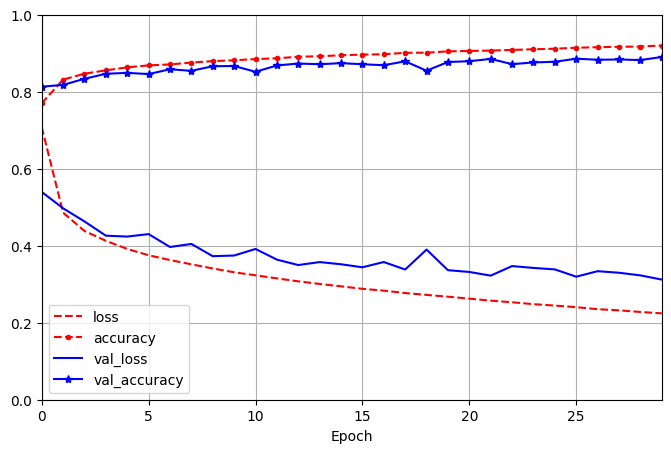

In [43]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])

We have a little bit of overfitting

In [44]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 856us/step - loss: 0.3121 - accuracy: 0.8902


[0.312091588973999, 0.8902000188827515]

In [47]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 44ms/step


array([[0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.31, 0.  , 0.  , 0.  , 0.  , 0.  , 0.66, 0.  , 0.02, 0.  ]],
      dtype=float32)

In [49]:
y_pred = y_proba.argmax(axis=-1)

In [50]:
y_pred

array([2, 3, 6])

In [51]:
np.array(class_names)[y_pred]

array(['Pullover', 'Dress', 'Shirt'], dtype='<U11')

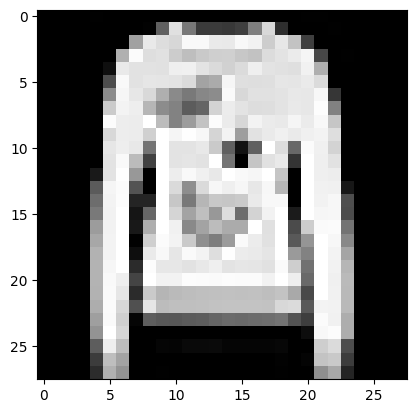

In [55]:
plt.imshow(X_new[0], cmap="gray")

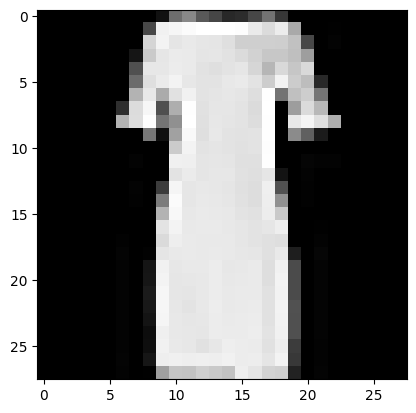

In [56]:
plt.imshow(X_new[1], cmap="gray")

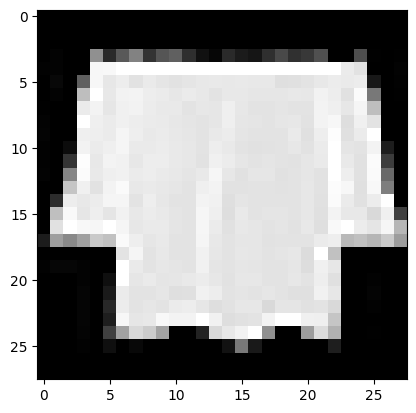

In [57]:
plt.imshow(X_new[2], cmap="gray")